In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
data = pd.read_csv('../data/data_fix.txt')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17368 entries, 0 to 17367
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coupon     317 non-null    object 
 1   currency   17368 non-null  object 
 2   driver     17368 non-null  int64  
 3   fact_km    12705 non-null  float64
 4   order      17368 non-null  int64  
 5   plan_km    17368 non-null  float64
 6   plan_time  17368 non-null  float64
 7   user       17368 non-null  int64  
 8   zone       17368 non-null  object 
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [140]:
data['currency'].unique()
len(data[data['currency'] == 'USD'])

1

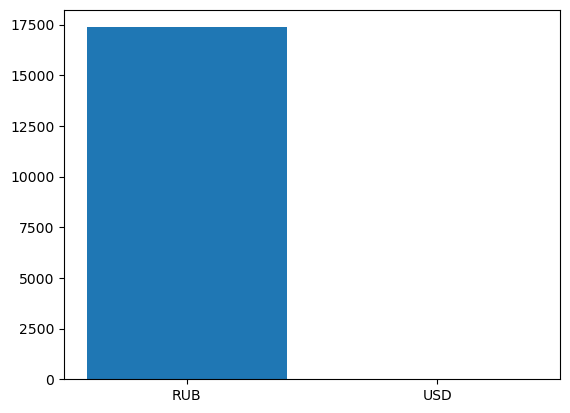

In [141]:
plt.bar(data['currency'].unique(), [len(data[data['currency'] == 'RUB']), len(data[data['currency'] == 'USD'])])
plt.show()

In [142]:
# подозрительный
data.query('currency == "USD"')

,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone
16184,NaN,USD,87453549,NaN,9218035,0.616003,3.366667,99251227,moscow


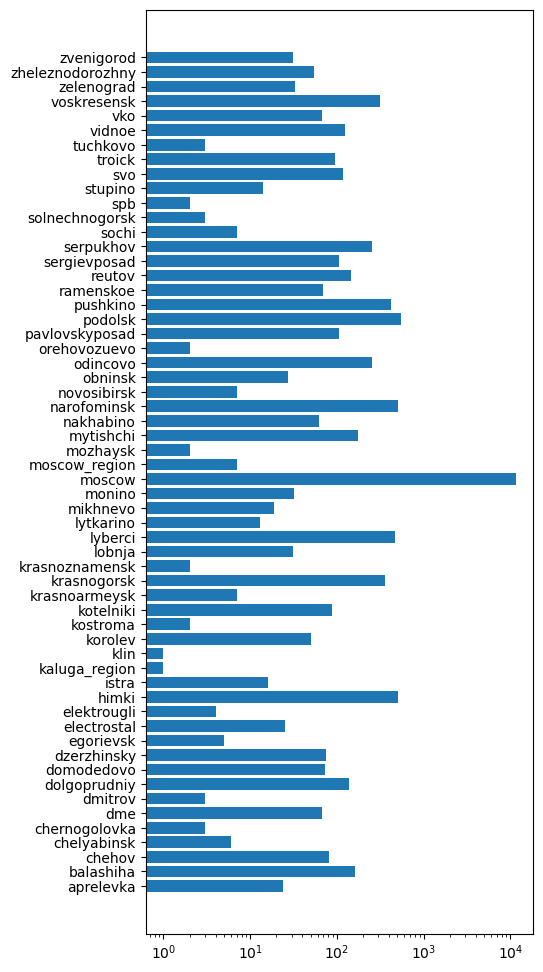

In [143]:
# podoz
zones = data.groupby('zone')['user'].count().reset_index()
zones.columns = ['zone', 'count']
zones
plt.figure(figsize=(5,12))
plt.barh(zones['zone'], zones['count'])
plt.xscale('log')
plt.xticks()
plt.show()

In [144]:
data['coupon'].fillna(0, inplace=True)

C:\Users\giezz\AppData\Local\Temp\ipykernel_8072\55966403.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['coupon'].fillna(0, inplace=True)


In [145]:
data['coupon'].unique()

array([0, 'micro_code', 'free_ride'], dtype=object)

In [146]:
coupones = data.groupby(['driver', 'coupon']).size().unstack(fill_value=0)

In [147]:
# podoz
coupones[coupones['free_ride'] == coupones['free_ride'].max()]

coupon,0,free_ride,micro_code
driver,,,
39939250,0,234,0


In [148]:
coupones[coupones['micro_code'] == coupones['micro_code'].max()]

coupon,0,free_ride,micro_code
driver,,,
60654971,101,0,4
93261902,102,0,4


In [149]:
data_km = data[data['fact_km'] != 0]
data_km['km_diff'] = data['plan_km'] / data['fact_km']
data_km.fillna(0, inplace=True)

C:\Users\giezz\AppData\Local\Temp\ipykernel_8072\1991665430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_km['km_diff'] = data['plan_km'] / data['fact_km']
C:\Users\giezz\AppData\Local\Temp\ipykernel_8072\1991665430.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_km.fillna(0, inplace=True)


In [150]:
# podoz
final_df = data_km.sort_values(by=['km_diff'], ascending=False)
final_df

,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone,km_diff
16211,0,RUB,59986309,0.010,38129866,1000.000000,11.366667,8004508,serpukhov,100000.000000
3237,0,RUB,85962232,0.010,64157443,62.164193,104.433333,41338309,pushkino,6216.419282
5630,0,RUB,7615016,0.001,7075781,2.085555,4.716667,28922538,moscow,2085.554923
10905,0,RUB,3076344,0.002,70071900,3.478474,6.333333,1318318,moscow,1739.237043
219,0,RUB,18264942,0.001,10462455,1.388722,3.466667,1472326,chehov,1388.722475
...,...,...,...,...,...,...,...,...,...,...
13282,0,RUB,1996092,0.000,84835569,4.574407,5.966667,7146088,moscow,0.000000
13280,0,RUB,98947777,0.000,36512109,2.007556,8.250000,63132493,moscow,0.000000
6675,0,RUB,7615016,0.000,99173483,2.331232,4.700000,5495637,moscow,0.000000
13277,0,RUB,36323096,0.000,32693902,1.404606,5.683333,99251227,moscow,0.000000


In [166]:
users = data.groupby(['user'])['driver'].count().reset_index()
users.columns = ['user', 'driver_count']
users[users['driver_count'] == users['driver_count'].max()]


,user,driver_count
4144,8531153,160


,coupon,currency,driver,fact_km,order,plan_km,plan_time,user,zone
61,0,RUB,36098567,NaN,86003457,0.848106,9.033333,8531153,moscow
259,0,RUB,9871171,NaN,82693238,3.106256,11.716667,8531153,moscow
456,0,RUB,32692269,NaN,71146295,0.268012,3.800000,8531153,moscow
520,0,RUB,32692269,NaN,59850488,1.537269,5.366667,8531153,moscow
652,0,RUB,92777159,NaN,65586907,1.026735,3.983333,8531153,moscow
...,...,...,...,...,...,...,...,...,...
16370,0,RUB,89859153,NaN,6449253,5.000000,10.000000,8531153,himki
16390,0,RUB,89859153,NaN,8653173,5.000000,10.000000,8531153,himki
16419,0,RUB,89859153,NaN,85896613,5.000000,10.000000,8531153,himki
16423,0,RUB,89859153,NaN,23294805,5.000000,10.000000,8531153,himki


: 